# Machine Learning Study Guide

## Preprocessing Data

In [102]:
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
import matplotlib
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn import linear_model
from yellowbrick.regressor import AlphaSelection
from sklearn.decomposition import PCA

import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
url = '/Users/VishalDubey/Vishal/College/polsci189fs/Notes/Boston.csv'
df = pd.read_csv(url)
data = df
data.head()

,SlNo,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,SlNo,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.shape

(506, 15)

In [8]:
# hold out random portion for test
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
 
#%%
# take a look at the data
profile = train.profile_report()
profile.to_file(output_file='report.html')

,medv,Value
0,mean,22.532806
1,median,21.200000


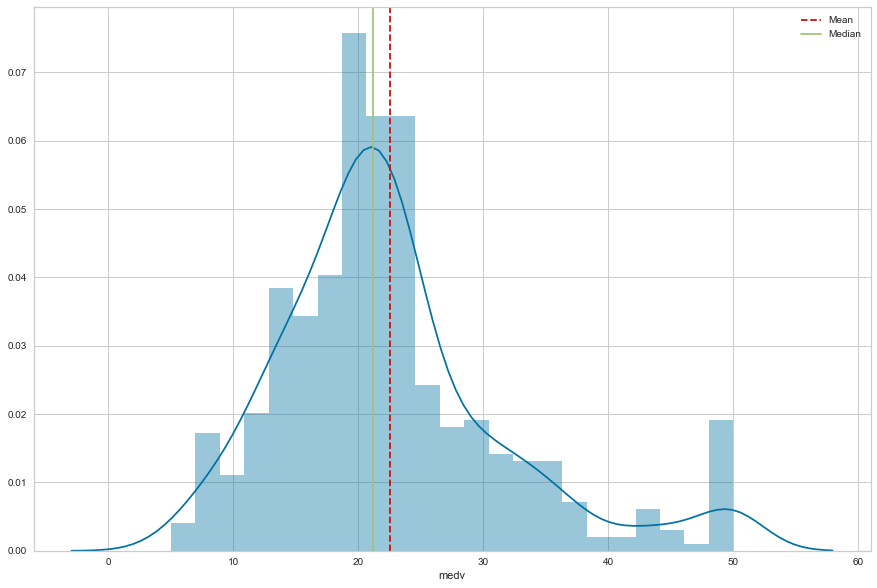

In [51]:
#describes values chosen 
vals = ['SlNo','crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
#predictors
X = data[vals].values

#target variable
y = data['medv'].values

#Plot creation
plt.figure(figsize=(15,10))
plt.tight_layout()

seabornInstance.distplot(data['medv'])
mean=data['medv'].mean()
median=data['medv'].median()

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')

pp.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'medv': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [56]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Regularization (ElasticNetCV)

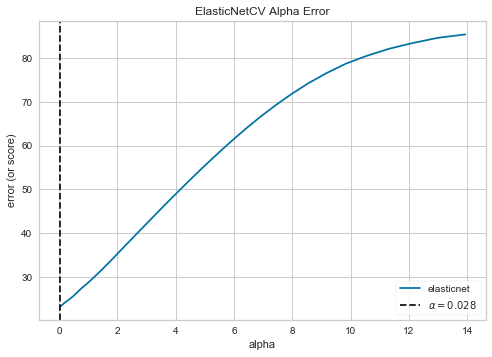

In [57]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [58]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.028, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

coefs = pd.DataFrame({ 'Variables': vals, 'Coefficients': clf.coef_})
display(coefs)

print("Intercept: " + str(clf.intercept_))

ElasticNet Predict with transformations:


,Variables,Coefficients
0,SlNo,-0.149092
1,crim,-0.891098
2,zn,0.955651
3,indus,-0.103425
4,chas,0.615859
5,nox,-1.606823
6,rm,2.649290
7,age,-0.121473
8,dis,-2.624369
9,rad,1.630083


Intercept: 22.611881188118836


In [60]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfElastic.head()

,Actual,Predicted
0,22.6,25.293511
1,50.0,23.358744
2,23.0,29.119406
3,8.3,12.088143
4,21.2,21.734250


Elastic Graph


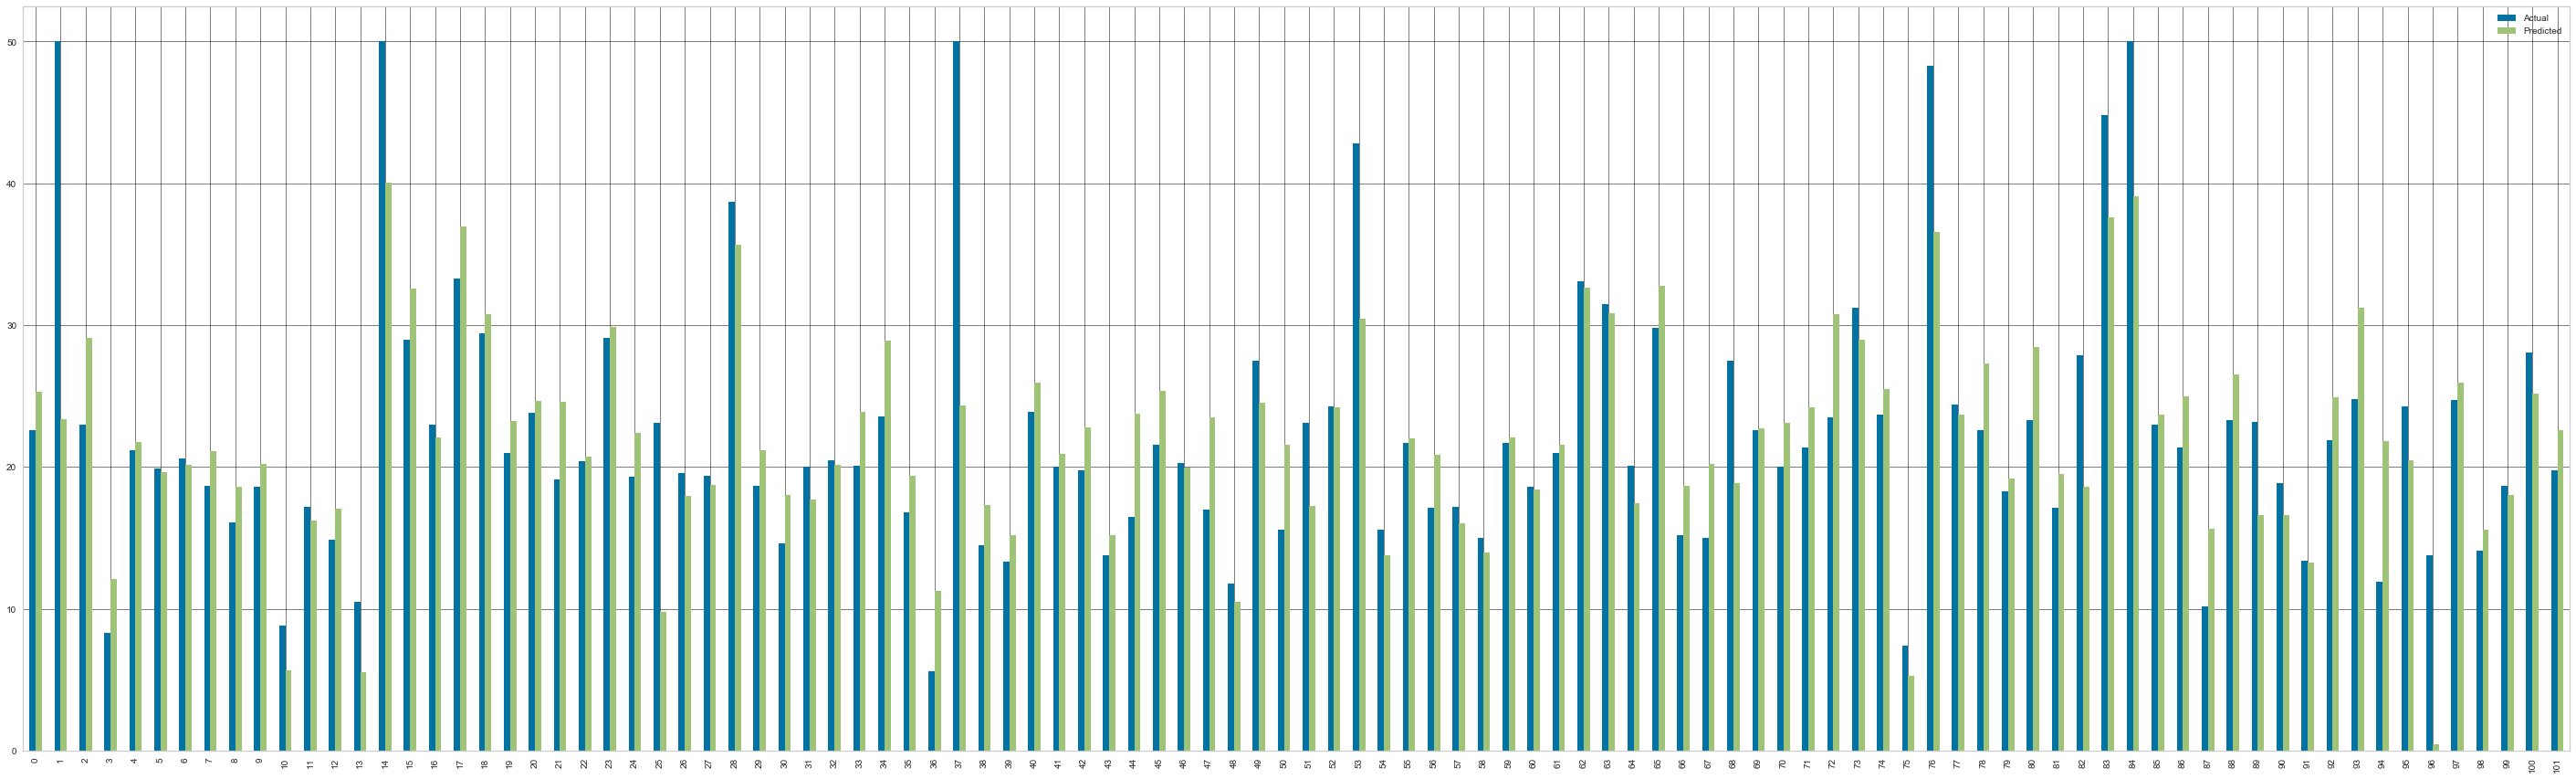

In [63]:
#Displays Residuals in Graphical Format
print("Elastic Graph")
dfElastic.plot(kind='bar',figsize=(50,15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.847235991266954
Mean Squared Error: 34.00050372934081
Root Mean Squared Error: 5.830995089119936


## Bootstrap

In [67]:
bootstrap_iter = 10000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
clf = linear_model.ElasticNet(alpha=.184, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
intercept =[]
for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    intercept.append(clf.intercept_)

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)

avg_ints = sum(intercept)/len(intercept)

for x in range(len(average)):
    average[x] = average[x]/len(average)
    
 

avgPD = pd.DataFrame({'Variables': vals, 'Average Coefficients': clf.coef_})
avgintPD = pd.DataFrame({'Average Intercept': ['avg_int'], 'Value': [avg_ints]})

display(avgPD)
display(avgintPD)

print('Mean Squared Error:', statistics.mean(accuracy))

,Variables,Average Coefficients
0,SlNo,-0.000000
1,crim,-0.353437
2,zn,0.591227
3,indus,-0.503612
4,chas,0.726506
5,nox,-0.768764
6,rm,3.547174
7,age,-0.711945
8,dis,-1.780781
9,rad,0.000000


,Average Intercept,Value
0,avg_int,22.599121


Mean Squared Error: 37.99799342186585


## Random Forest

In [13]:
all_feat = ["SlNo","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]
yvar = "medv"

In [44]:
lab_enc = preprocessing.LabelEncoder()
rfData = pd.DataFrame()
for i in data.columns:
    encoded = lab_enc.fit_transform(data[i])
    rfData[i] = encoded
rfData.head()

,SlNo,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0,3,19,0,51,320,172,297,0,34,9,356,53,137
1,1,23,0,56,0,36,279,225,333,1,11,23,356,161,113
2,2,22,0,56,0,36,400,159,333,1,11,23,271,28,196
3,3,32,0,16,0,33,383,112,361,2,5,31,311,6,193
4,4,110,0,16,0,33,395,139,361,2,5,31,356,64,203


In [99]:
X = rfData.loc[:, all_feat]
Y = rfData[yvar]

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf = rf.fit(X, Y)
# check out accuracy 
print("Random Forest: "+str(1-rf.oob_score_))


Random Forest: 0.9604743083003953


In [41]:
#%%
# what features were important?
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
 
# Print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 6 (0.116962)
2. feature 13 (0.113703)
3. feature 0 (0.111427)
4. feature 1 (0.110886)
5. feature 7 (0.106563)
6. feature 8 (0.100814)
7. feature 12 (0.093616)
8. feature 5 (0.062295)
9. feature 3 (0.044989)
10. feature 11 (0.042254)
11. feature 10 (0.039542)
12. feature 9 (0.028851)
13. feature 2 (0.019017)
14. feature 4 (0.009080)


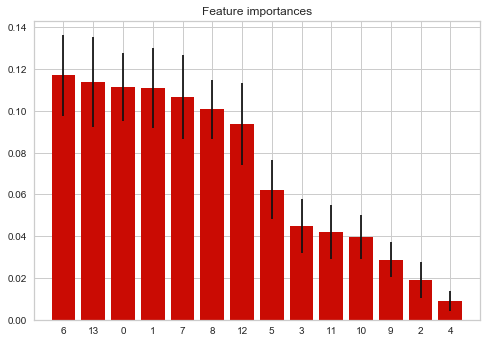

In [50]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [101]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree.plot_tree(clf)
#plt.show()
msk = np.random.rand(len(data)) < 0.8
train = rfData[msk]
test = rfData[~msk]

# check out accuracy 
pred = clf.predict(test.loc[:, all_feat])
print("Accuracy of decision tree - test sample: "+str(np.round(accuracy_score(test['medv'], pred), 3)))


Accuracy of decision tree - test sample: 1.0


## Feature Selection (PCA) with ElasticCV

In [111]:
#describes values chosen 
vals = ['SlNo','crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
#predictors
X = data[vals].values

#target variable
y = data['medv'].values

#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

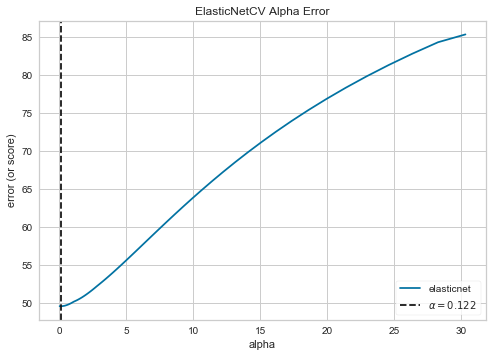

In [116]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [121]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.028, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


ElasticNet Predict with transformations:


In [122]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfElastic.head()

,Actual,Predicted
0,22.6,27.478099
1,50.0,16.326267
2,23.0,22.522332
3,8.3,13.641888
4,21.2,24.634484


In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.636858552627116
Mean Squared Error: 71.686241792489
Root Mean Squared Error: 8.466772808602402
